# TensorFlow 
## Linear Regression Model using Eager API
### by [Sameer Kumar](https://sites.google.com/view/bvsk35/home?authuser=0)

## Part 2
**Here I have implemented a simple linear regression model using Eager API.**

## Note
- Remember that once tensorflow eager has been enabled it can't be turned off. We will need to restart everything. 
- Once tensorflow eager has been enabled then we can build models for training and for other purposes as explained [here](https://www.tensorflow.org/guide/eager). We can also use `tf.contrib.eager` module which contains functions which can be used for graph execution as described [here](https://www.tensorflow.org/api_docs/python/tf/contrib/eager).
- `implicit_gradients`: [here](https://www.tensorflow.org/api_docs/python/tf/contrib/eager/implicit_gradients) you can find how to implement gradient descent using Eager API. It uses the [apply_gradients](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer#apply_gradients) method.

In [1]:
# Import Libraries:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
# Generate the data
Train_X = np.arange(1, 51).astype(np.float64) # Inputs
Train_Y = np.arange(1, 51) + np.random.uniform(-1, 1, (50,)).astype(np.float64) # Output
N = Train_X.shape[0] # Total no.of samples

In [4]:
# Parameters for training:
max_iter = 10000 # Total training epochs
verbose_freq = 200 # Frequency of printing stats of training

In [5]:
# Variables for the tensorflow computation graph:
# Variables that will be initialised with some value and will be modified 
# during training based on loss optimization
W = tfe.Variable(initial_value=np.random.uniform(-1, 1, size=(1,1)), name='Weights') # Weights
b = tfe.Variable(initial_value=np.random.uniform(-1, 1, size=(1)), name='Bias') # Bias

In [6]:
def linear_reg(inputs, labels):
    # Predicted Output
    pred = tf.add(tf.matmul(W, tf.transpose(inputs)), b)
    # Loss: Mean Squared Error
    loss = tf.reduce_sum(0.5 * tf.square(pred - labels))/N
    return loss

opt = tf.train.AdamOptimizer()
# opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Compute Gradients
grad = tfe.implicit_gradients(linear_reg)

In [7]:
# Initial cost before optimizing
print('Initial Cost: {0:.4f}'.format(linear_reg(Train_X.reshape(N, 1), Train_Y.reshape(N, 1))), 
      'W:', W.numpy(), 'b:', b.numpy())

# Training
for training_step in range(max_iter+1):
#     for (x, y) in zip(Train_X, Train_Y):
#         opt.apply_gradients(grad(x.reshape(1, 1), y.reshape(1, 1)))
    opt.apply_gradients(grad(Train_X.reshape(N, 1), Train_Y.reshape(N, 1)))
    # Print every so often
    if training_step % verbose_freq == 0:
        print('Epoch: {0:04d} Loss: {1:.3f}'.format(training_step, linear_reg(Train_X.reshape(N, 1), Train_Y.reshape(N, 1))), 
              'W:', W.numpy(), 'b:', b.numpy())

Initial Cost: 20556.0293 W: [[0.01566877]] b: [0.37422908]
Instructions for updating:
Colocations handled automatically by placer.
Epoch: 0000 Loss: 20523.411 W: [[0.01666877]] b: [0.37522908]
Epoch: 0200 Loss: 15204.318 W: [[0.20435495]] b: [0.56614379]
Epoch: 0400 Loss: 11977.366 W: [[0.36152712]] b: [0.73583842]
Epoch: 0600 Loss: 10208.925 W: [[0.48649018]] b: [0.88551465]
Epoch: 0800 Loss: 9350.224 W: [[0.5793478]] b: [1.01791928]
Epoch: 1000 Loss: 8983.969 W: [[0.64260446]] b: [1.13726534]
Epoch: 1200 Loss: 8841.238 W: [[0.6812179]] b: [1.24877027]
Epoch: 1400 Loss: 8780.563 W: [[0.70161404]] b: [1.35775517]
Epoch: 1600 Loss: 8742.768 W: [[0.71014623]] b: [1.46871341]
Epoch: 1800 Loss: 8708.533 W: [[0.7118729]] b: [1.58476712]
Epoch: 2000 Loss: 8673.064 W: [[0.7101331]] b: [1.70763584]
Epoch: 2200 Loss: 8635.573 W: [[0.70678538]] b: [1.83794995]
Epoch: 2400 Loss: 8596.118 W: [[0.70271123]] b: [1.97565496]
Epoch: 2600 Loss: 8554.890 W: [[0.69827198]] b: [2.12033725]
Epoch: 2800 Los

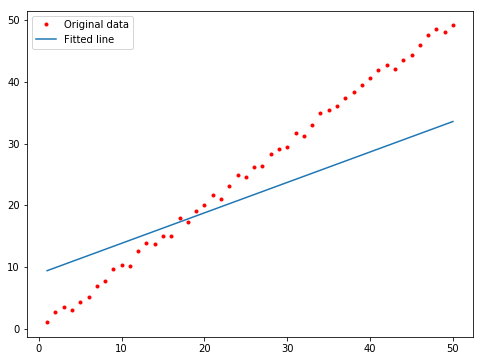

In [8]:
# Plot Final Result
plt.figure(figsize=(8, 6))
plt.plot(Train_X, Train_Y, 'r.', label='Original data')
plt.plot(Train_X.reshape(N, 1), Train_X.reshape(50, 1) * W.numpy() + b.numpy(), label='Fitted line')
plt.legend()
plt.show()